# 2. General statistics

This is the second Notebook that has to be runned

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, anderson
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('/home/razkinm/projects/6articulodbs/derivates/df_preprocessed.csv', sep=',')

### Which is the proportion of optimal/suboptimal/outSTN in LeadDBS?

In [4]:
# LEAD DBS
optimos = df['LEAD'].value_counts()['optimo'] 
suboptimos = df['LEAD'].value_counts()['suboptimo']
fuera = df['LEAD'].value_counts()['fuera']
proportion_lead_optimos = (optimos/(optimos+suboptimos+fuera))*100
proportion_lead_suboptimos = (suboptimos/(optimos+suboptimos+fuera))*100
proportion_lead_fuera = (fuera/(optimos+suboptimos+fuera))*100
print('LEAD DBS')
print('Optimos: ', optimos)
print('Suboptimos: ', suboptimos)
print('Fuera: ', fuera)
print('Proportion optimos: ', proportion_lead_optimos)
print('Proportion suboptimos: ', proportion_lead_suboptimos)
print('Proportion fuera: ', proportion_lead_fuera)

LEAD DBS
Optimos:  81
Suboptimos:  28
Fuera:  9
Proportion optimos:  68.64406779661016
Proportion suboptimos:  23.728813559322035
Proportion fuera:  7.627118644067797


### ¿How many of suboptimal and outSTN had beta activity registered?

In [5]:
filtro_suboptimo = df['LEAD'].isin(['suboptimo'])
conteo_suboptimo = df[filtro_suboptimo & df['FRECUENCIA'].notnull()].shape[0]
print(f"Registros con LEAD 'suboptimo' o 'fuera' y registro de actividad de frecuencia: {conteo_suboptimo}")
filtro_fuera = df['LEAD'].isin(['fuera'])
conteo_fuera = df[filtro_fuera & df['FRECUENCIA'].notnull()].shape[0]
print(f"Registros con LEAD 'suboptimo' o 'fuera' y registro de actividad de frecuencia: {conteo_fuera}")

Registros con LEAD 'suboptimo' o 'fuera' y registro de actividad de frecuencia: 28
Registros con LEAD 'suboptimo' o 'fuera' y registro de actividad de frecuencia: 9


### Which is the distribution of Frequency and Beta Power?

/tmp/ipykernel_2109/3705823608.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LEAD', y='FRECUENCIA', data=df, palette="Set2", width=0.6, fliersize=3, linewidth=1, ax=ax1)
/tmp/ipykernel_2109/3705823608.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LEAD', y='MAGNITUD', data=df, palette="Set2", width=0.6, fliersize=3, linewidth=1, ax=ax2)


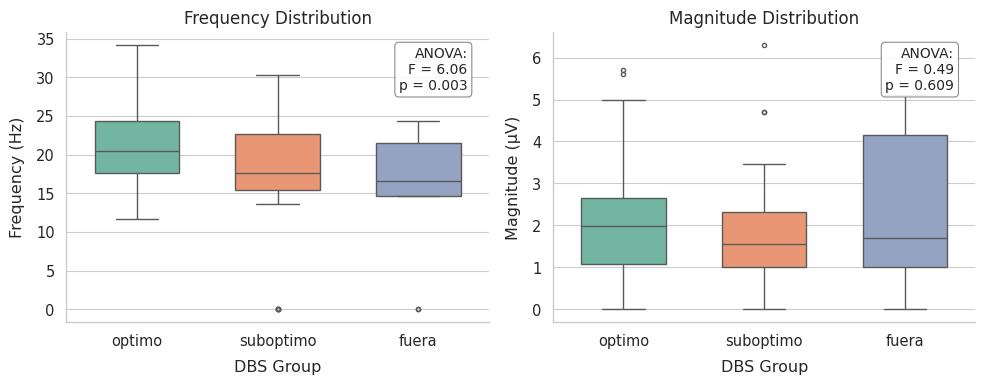

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set publication-friendly style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Create figure
plt.figure(figsize=(10, 4))

# Boxplot 1: Frequency
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='LEAD', y='FRECUENCIA', data=df, palette="Set2", width=0.6, fliersize=3, linewidth=1, ax=ax1)
ax1.set_xlabel("DBS Group", labelpad=8)
ax1.set_ylabel("Frequency (Hz)", labelpad=8)
ax1.set_title('Frequency Distribution', fontsize=12)
sns.despine(ax=ax1)

# Add ANOVA result for Frequency inside a box
ax1.text(
    0.95, 0.95, 'ANOVA:\nF = 6.06\np = 0.003',
    transform=ax1.transAxes, ha='right', va='top', fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.9)
)

# Boxplot 2: Magnitude (or beta power)
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='LEAD', y='MAGNITUD', data=df, palette="Set2", width=0.6, fliersize=3, linewidth=1, ax=ax2)
ax2.set_xlabel("DBS Group", labelpad=8)
ax2.set_ylabel("Magnitude (µV)", labelpad=8)
ax2.set_title('Magnitude Distribution', fontsize=12)
sns.despine(ax=ax2)

# Add ANOVA result for Magnitude inside a box
ax2.text(
    0.95, 0.95, 'ANOVA:\nF = 0.49\np = 0.609',
    transform=ax2.transAxes, ha='right', va='top', fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.9)
)

# Layout and save
plt.tight_layout()
plt.savefig('distributions_with_anova.svg', dpi=300, format='svg')
plt.show()


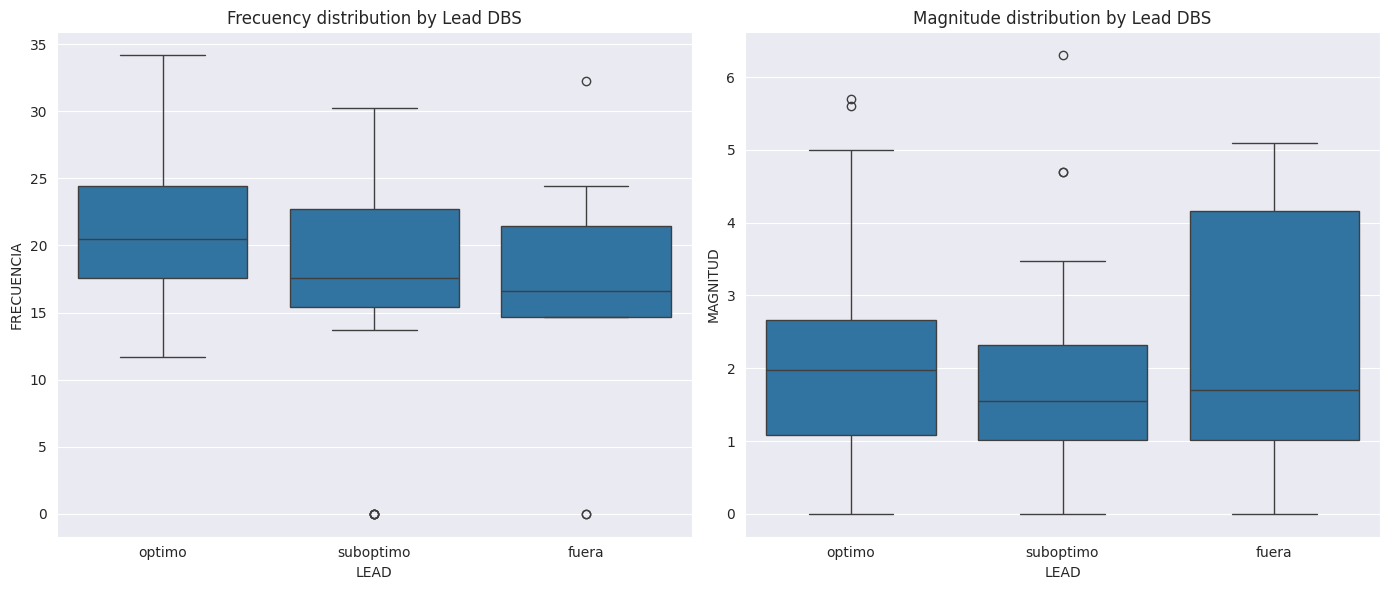

In [ ]:
# Visualize data with boxplots
sns.set_style("darkgrid") 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='LEAD', y='FRECUENCIA', data=df)
plt.title('Frecuency distribution by Lead DBS')

plt.subplot(1, 2, 2)
sns.boxplot(x='LEAD', y='MAGNITUD', data=df)
plt.title('Magnitude distribution by Lead DBS')

plt.tight_layout()
plt.savefig('distribuciones.svg', dpi=300, format='svg')
plt.show()

### ¿Is there any diferences regarding frequency or beta power in this cases?

#### To answer that, first we need to know, is the data normal?

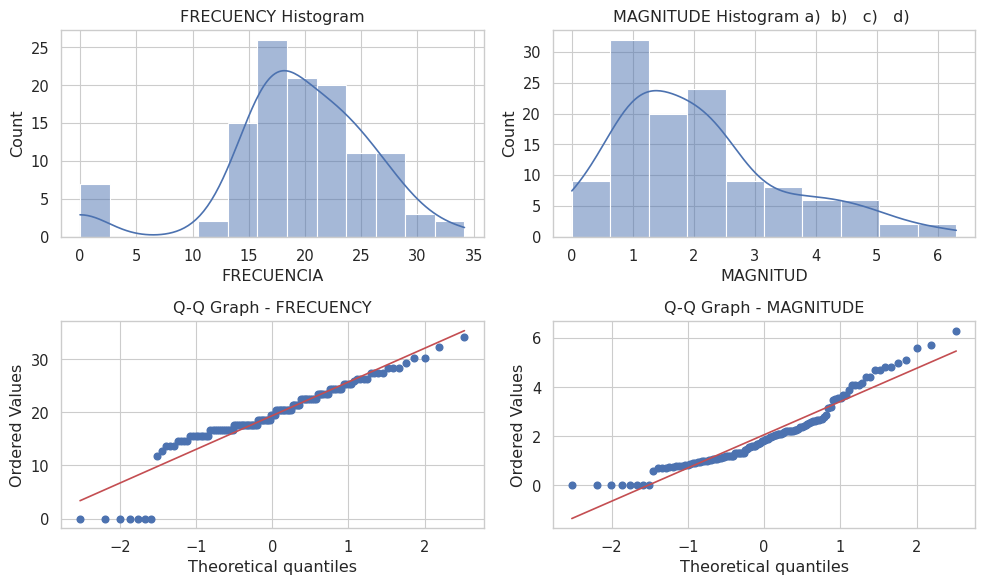

Prueba de Shapiro-Wilk para FRECUENCIA: W=0.8956222727384286, p=1.4324364155943562e-07
Prueba de Shapiro-Wilk para MAGNITUD: W=0.9299498917943276, p=1.1203644356291503e-05


In [ ]:
# Visualize histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['FRECUENCIA'], kde=True)
plt.title('FRECUENCY Histogram')

plt.subplot(2, 2, 2)
sns.histplot(df['MAGNITUD'], kde=True)
plt.title('MAGNITUDE Histogram a)  b)   c)   d) ')

# Visualizar gráficos Q-Q
plt.subplot(2, 2, 3)
stats.probplot(df['FRECUENCIA'], dist="norm", plot=plt)
plt.title('Q-Q Graph - FRECUENCY')

plt.subplot(2, 2, 4)
stats.probplot(df['MAGNITUD'], dist="norm", plot=plt)
plt.title('Q-Q Graph - MAGNITUDE')

plt.tight_layout()
plt.savefig('normalidad.svg', dpi=300, format='svg')
plt.show()
# Shapiro-Wilk Test for FRECUENCIA y MAGNITUD
shapiro_frecuencia = shapiro(df['FRECUENCIA'])
shapiro_magnitud = shapiro(df['MAGNITUD'])

print(f"Prueba de Shapiro-Wilk para FRECUENCIA: W={shapiro_frecuencia.statistic}, p={shapiro_frecuencia.pvalue}")
print(f"Prueba de Shapiro-Wilk para MAGNITUD: W={shapiro_magnitud.statistic}, p={shapiro_magnitud.pvalue}")


Histograms and Q-Q plots analyzing the distribution of frequency (a, c) and magnitude (b, d). Panels (a) and (b) present histograms showing the distribution of frequencies and magnitudes, respectively, with overlaid density curves. Panels (c) and (d) display Q-Q plots comparing the observed values to a theoretical normal distribution for frequency and magnitude, respectively, indicating deviations from normality in the data distribution.

#### YES, data is normative, ANOVA  test now

In [ ]:
# ANOVA test for FRECUENCIA
frecuencia_groups = [df[df['LEAD'] == group]['FRECUENCIA'] for group in ['fuera', 'suboptimo', 'optimo']]
anova_result_frecuencia = f_oneway(*frecuencia_groups)
print(f"ANOVA FRECUENCIA: F={anova_result_frecuencia.statistic}, p={anova_result_frecuencia.pvalue}")

# ANOVA test for MAGNITUD
magnitud_groups = [df[df['LEAD'] == group]['MAGNITUD'] for group in ['fuera', 'suboptimo', 'optimo']]
anova_result_magnitud = f_oneway(*magnitud_groups)
print(f"ANOVA MAGNITUD: F={anova_result_magnitud.statistic}, p={anova_result_magnitud.pvalue}")


ANOVA FRECUENCIA: F=6.069471958171593, p=0.0031196533713648755
ANOVA MAGNITUD: F=0.49738749431883084, p=0.6094194079404638


### Is the beta pwer decreasing from optimal to suboptimal or from optimal to outSTN?

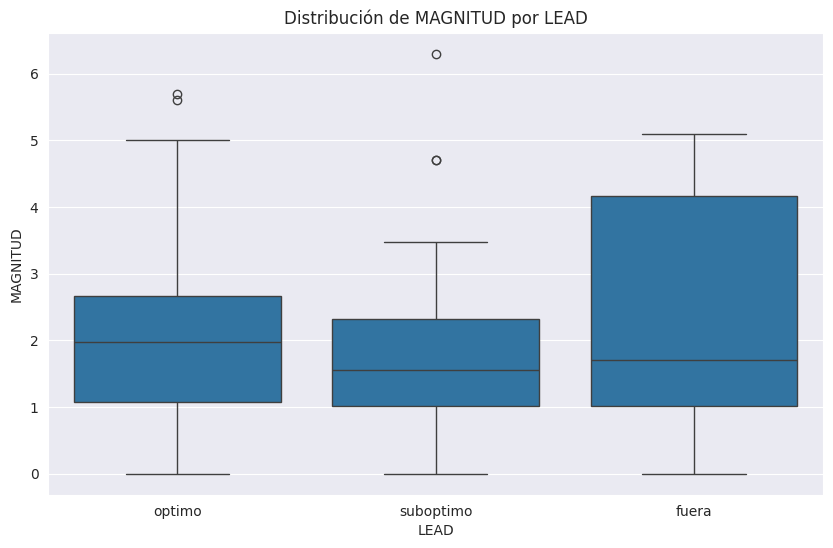

ANOVA: F=0.49738749431883084, p=0.6094194079404638
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 fuera    optimo  -0.1132 0.9707 -1.2713 1.0449  False
 fuera suboptimo  -0.3933 0.7406 -1.6562 0.8697  False
optimo suboptimo    -0.28 0.6286 -1.0026 0.4425  False
------------------------------------------------------


In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LEAD', y='MAGNITUD', data=df)
plt.title('Distribución de MAGNITUD por LEAD')
plt.show()

# ANOVA
anova_result = f_oneway(df[df['LEAD'] == 'optimo']['MAGNITUD'],
                        df[df['LEAD'] == 'suboptimo']['MAGNITUD'],
                        df[df['LEAD'] == 'fuera']['MAGNITUD'])
print(f"ANOVA: F={anova_result.statistic}, p={anova_result.pvalue}")

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['MAGNITUD'], groups=df['LEAD'], alpha=0.05)
print(tukey)

In [10]:
# ANOVA
anova_result = f_oneway(df[df['LEAD'] == 'optimo']['FRECUENCIA'],
                        df[df['LEAD'] == 'suboptimo']['FRECUENCIA'],
                        df[df['LEAD'] == 'fuera']['FRECUENCIA'])
print(f"ANOVA: F={anova_result.statistic}, p={anova_result.pvalue}")

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=df['FRECUENCIA'], groups=df['LEAD'], alpha=0.05)
print(tukey)

ANOVA: F=6.069471958171593, p=0.0031196533713648755
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
 fuera    optimo   4.6986 0.0938 -0.6077  10.005  False
 fuera suboptimo   0.4051 0.9849 -5.3818  6.1919  False
optimo suboptimo  -4.2936 0.0073 -7.6044 -0.9828   True
-------------------------------------------------------


In this case, the answer is No

In [ ]:
# we are going to create a new df so we just have optimal and supotimal/out, this two will be  all outSTN.
dfmerge = df.copy()
dfmerge['LEAD'] = dfmerge['LEAD'].replace({'suboptimo': 'fuera'})

In [26]:
from scipy.stats import levene

stat, p = levene(dfmerge[dfmerge['LEAD'] == 'fuera']['FRECUENCIA'],
                 dfmerge[dfmerge['LEAD'] == 'optimo']['FRECUENCIA'])

print(f"Levene test: stat={stat:.3f}, p={p:.3f}")

from scipy.stats import levene

stat, p = levene(dfmerge[dfmerge['LEAD'] == 'fuera']['MAGNITUD'],
                 dfmerge[dfmerge['LEAD'] == 'optimo']['MAGNITUD'])

print(f"Levene test: stat={stat:.3f}, p={p:.3f}")


Levene test: stat=12.297, p=0.001
Levene test: stat=1.582, p=0.211


In [27]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(dfmerge[dfmerge['LEAD'] == 'fuera']['FRECUENCIA'],
                            dfmerge[dfmerge['LEAD'] == 'optimo']['FRECUENCIA'],
                            equal_var=False)  # Usa False si sospechas que las varianzas no son iguales
print(f"T-test FRECUENCIA: t={t_stat:.3f}, p={p_value:.3f}")

t_stat, p_value = ttest_ind(dfmerge[dfmerge['LEAD'] == 'fuera']['MAGNITUD'],
                            dfmerge[dfmerge['LEAD'] == 'optimo']['MAGNITUD'],
                            equal_var=True)  # Usa False si sospechas que las varianzas no son iguales
print(f"T-test MAGNITUD: t={t_stat:.3f}, p={p_value:.3f}")


T-test FRECUENCIA: t=-2.753, p=0.009
T-test MAGNITUD: t=-0.671, p=0.504
